In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [35]:
def count(a, b):
    m = len(a)
    n = len(b)
 
    # Create a table to store results of sub-problems
    lookup = [[0] * (n + 1) for i in range(m + 1)]
 
    # If first string is empty
    for i in range(n+1):
        lookup[0][i] = 0
 
    # If second string is empty
    for i in range(m + 1):
        lookup[i][0] = 1
 
    # Fill lookup[][] in bottom up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
             
            # If last characters are same, 
            # we have two options -
            # 1. consider last characters of 
            # both strings in solution
            # 2. ignore last character of first string
            if a[i - 1] == b[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + lookup[i - 1][j]
                 
            else:
                # If last character are different, ignore
                # last character of first string
                lookup[i][j] = lookup[i - 1][j]
 
    return lookup[m][n]

In [36]:
"""
My program will take in: 
(1) A value of n.
(2) A number k of deletions to perform (exactly k deletions will be performed).

The output will be (a) the average of the log of the number of times Y appears as a subsequence of X, and
(b) the average of the log of the number of times Y appears as a subsequence of X, conditioned on Y=0, of the 
appropriate length.
"""

def gen_all(n):
    """Generates all 0/1 strings of length n, as a list."""
    if n < 0: 
        raise "Error: no strings of negative length."
    if n == 0:
        return [""]
    rec = gen_all(n-1)
    return ["0" + s for s in rec] + ["1" + s for s in rec]

def weight(s):
    """Computes Hamming weight of string s."""
    return sum([si == "1" for si in s])

def gen_all_wk(n, k):
    """Generates all strings of length n and weight k."""
    all_strs = gen_all(n)
    res = []
    for s in all_strs:
        if weight(s) == k:
            res.append(s)
    return res

def bdc(s, del_pattern):
    return "".join([s[i] for i in range(len(s)) if (del_pattern[i] == "0")])

def is_monom(s):
    """returns true if s is monochromatic (all the same bit)"""
    return all([si == "1" for si in s]) or all([si == "0" for si in s])

def unif_vs_y0_exp(n, k):
    del_patterns = gen_all_wk(n, k)
    monom_freq = 0
    freq = 0
    log_subseqs = 0
    log_subseqs_monom = 0
    for X in gen_all(n):
        for del_pattern in del_patterns:
            Y = bdc(X, del_pattern)
            subseqs = count(X, Y)
            if is_monom(Y):
                monom_freq += 1
                log_subseqs_monom += subseqs
            log_subseqs += subseqs
            freq += 1
    return log_subseqs / freq, log_subseqs_monom / monom_freq

def unif_vs_y0_log(n, k):
    del_patterns = gen_all_wk(n, k)
    monom_freq = 0
    freq = 0
    log_subseqs = 0
    log_subseqs_monom = 0
    for X in gen_all(n):
        for del_pattern in del_patterns:
            Y = bdc(X, del_pattern)
            subseqs = count(X, Y)
            if is_monom(Y):
                monom_freq += 1
                log_subseqs_monom += np.log2(subseqs)
            log_subseqs += np.log2(subseqs)
            freq += 1
    return log_subseqs / freq, log_subseqs_monom / monom_freq

In [37]:
for n in range(9, 10):
    print("doing n = ", n)
    for k in range(1, n):
        v1, v2 = unif_vs_y0_exp(n, k)
        if v1 > v2:
            print("Y=0 lost to Y unconditioned")

doing n =  9


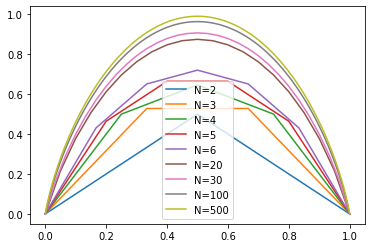

In [59]:
for N in [2, 3,4,5,6, 20, 30, 100, 500]:
    X=np.arange(N+1)
    plt.plot(X / N, np.log2(comb(N,X))/ N, label=f"N={N}")
plt.legend()
